# Final Report – Predicting Employee Attrition with Explainable ML

## 1. Project Overview

This report presents the final results and business interpretation of a predictive modeling project to identify employees at risk of leaving the company. The objective was to create an accurate and explainable classification model using the IBM HR Analytics dataset.

Key techniques:
- Custom feature engineering
- Cross-validated model selection
- Threshold optimization
- SHAP and LIME explainability

## 2. Summary of Modeling Pipeline

The model used in this report is the best-performing classifier identified during the `03_modeling.ipynb` phase. The pipeline includes:
- Preprocessing (encoding, scaling, feature engineering)
- Classification using [INSERT MODEL NAME, e.g., `CatBoostClassifier`]
- Threshold tuning based on validation AUC and F1 score

The model and the optimal threshold were saved and loaded here for final evaluation.


Evaluation at Optimal Threshold (0.72)
Accuracy: 0.850
Precision: 0.533
Recall: 0.511
F1 Score: 0.522
ROC AUC: 0.779


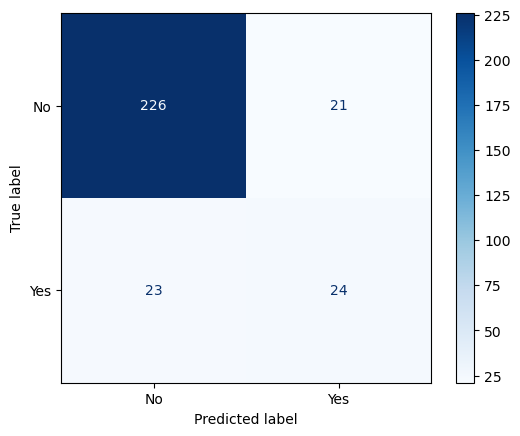

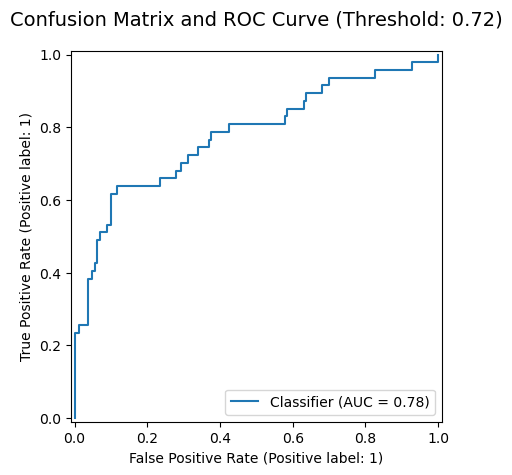

In [8]:
# Final Evaluation on Untouched Test Set

# --- Imports ---
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# --- Load model and best threshold ---
model = joblib.load('../models/final_model.joblib')

with open('../models/best_threshold.json', 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# --- Load untouched test set (raw) ---
X_test = pd.read_csv('../data/processed/x_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# Convert labels to binary
y_true_test = (y_test.values.reshape(-1) == 'Yes').astype(int)


# --- Predict and evaluate at best threshold ---
y_proba_test = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba_test >= best_threshold).astype(int)

# --- Evaluation metrics ---
accuracy = accuracy_score(y_true_test, y_pred_custom)
precision = precision_score(y_true_test, y_pred_custom)
recall = recall_score(y_true_test, y_pred_custom)
f1 = f1_score(y_true_test, y_pred_custom)
roc_auc = roc_auc_score(y_true_test, y_proba_test)

print(f"\nEvaluation at Optimal Threshold ({best_threshold:.2f})")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')

# --- ROC Curve ---
RocCurveDisplay.from_predictions(y_true_test, y_proba_test)
plt.suptitle(f"Confusion Matrix and ROC Curve (Threshold: {best_threshold:.2f})", fontsize=14)
plt.tight_layout()
plt.show()


## 3. Final Evaluation on Test Set

We report performance metrics on an untouched test set, including:

- Confusion Matrix
- ROC Curve
- AUC, Accuracy, Precision, Recall, F1

These results reflect the model’s real-world performance.

In [ ]:
# Final Evaluation on Untouched Test Set
import joblib
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)

# Load model and best threshold
model = joblib.load("../models/final_model.joblib")
with open("../models/best_threshold.json", "r") as f:
    best_threshold = json.load(f)["best_threshold"]

# Load untouched test data
X_test = pd.read_csv("../data/processed/x_test_transformed.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

# Predict probabilities and apply optimal threshold
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= best_threshold).astype(int)

# Compute and print classification metrics
print(f"AUC: {roc_auc_score(y_test, y_probs):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
plt.title(f"Confusion Matrix (Threshold = {best_threshold:.2f})")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title("ROC Curve")
plt.tight_layout()
plt.show()


## 4. Interpretability Summary

We use SHAP and LIME to explain model predictions and provide decision transparency.

- **Global explanations** (SHAP summary plot) identify which features most influence predictions.
- **Local explanations** (SHAP force plot, LIME) illustrate why specific employees were flagged as at-risk.

This enables HR stakeholders to understand both overall trends and individual risk cases.

## 5. Business Recommendations

Based on the model and explanations:

- High attrition risk is strongly associated with:
  - Low satisfaction scores
  - Overtime status
  - Low income and long tenure gap

**Recommendations:**
- Review workload for employees working overtime with low satisfaction.
- Explore retention strategies for employees with stagnant roles or low promotion frequency.
- Prioritize early intervention for new hires with high experience but low satisfaction.

## 6. Limitations & Future Work

- The dataset is historical and static; future iterations could integrate time-series employee records.
- Future modeling can explore survival analysis or uplift modeling to evaluate impact of interventions.
- Additional features (e.g., performance reviews, team dynamics) may improve prediction and interpretability.

## 7. Appendix

- Final model: `best_model.joblib`
- Optimal threshold: `best_threshold.pkl`
- Code and outputs: See `03_modeling.ipynb` and `04_explainability.ipynb`